In [38]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import os

import tensorflow as tf
from tensorflow.keras import Sequential, layers

DATADIR = 'IMG//'
CATEGORIES = ["0","1","2","3","4","5","6","7","8","9"]

In [50]:
MAIN_FOLDER = "dataset//" 

def create_training_data(main_folder):
    training_data_list = []

    for label in os.listdir(main_folder):
        label_folder = os.path.join(main_folder, label)

        if os.path.isdir(label_folder):

            for img_filename in os.listdir(label_folder):
                img_path = os.path.join(label_folder, img_filename)


                if img_filename.lower().endswith(('.png', '.jpg', '.jpeg')):

                    img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

                    if img_array is not None:

                        img_array = np.array(img_array, dtype=np.uint8)
                        label_int = int(label)  
                        training_data_list.append([img_array, label_int])

    return training_data_list

training_data = create_training_data(MAIN_FOLDER)

print(training_data[0])


[array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), 1]


In [51]:
len(training_data)

10764

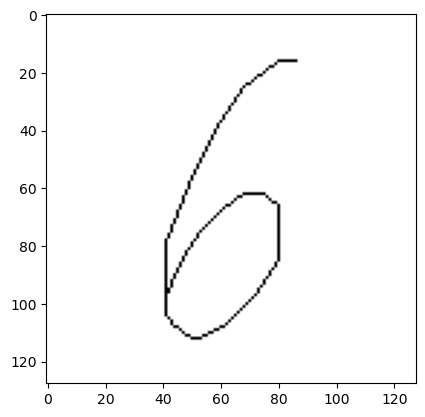

6


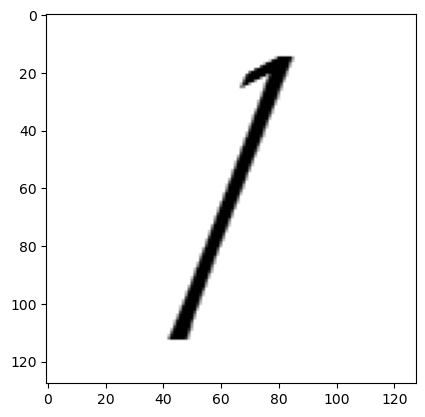

1


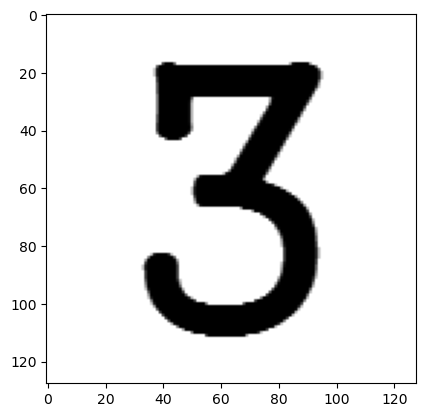

3


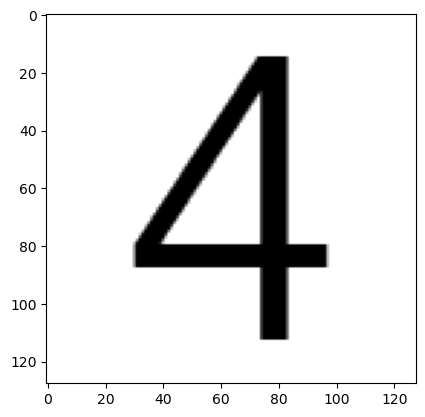

4


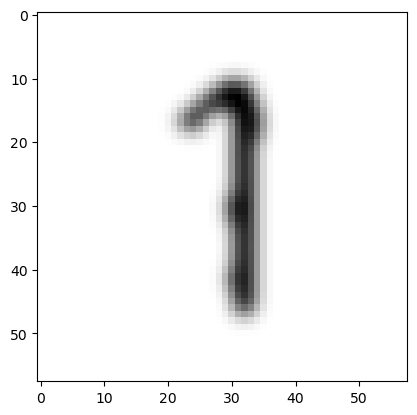

1


In [52]:
import random
random.seed(9144)
random.shuffle(training_data)


for features,label in training_data[:5]:
    plt.imshow(features, cmap='gray')
    plt.show()
    print(label) 

In [53]:
IMG_SIZE = 100

X = []
y = []

for features, label in training_data:
    resized_features = cv2.resize(features, (IMG_SIZE, IMG_SIZE)) 
    X.append(resized_features)
    y.append(label)

    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X = X.astype('float32')
X = X / 255.0

y = np.array(y)

print(len(X))
print(len(y))

10764
10764


In [54]:
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X, y, epochs=5)

Epoch 1/5
337/337 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.8009 - loss: 0.6686
Epoch 2/5
337/337 ━━━━━━━━━━━━━━━━━━━━ 27s 80ms/step - accuracy: 0.9859 - loss: 0.0523
Epoch 3/5
337/337 ━━━━━━━━━━━━━━━━━━━━ 27s 81ms/step - accuracy: 0.9940 - loss: 0.0222
Epoch 4/5
337/337 ━━━━━━━━━━━━━━━━━━━━ 28s 81ms/step - accuracy: 0.9957 - loss: 0.0168
Epoch 5/5
337/337 ━━━━━━━━━━━━━━━━━━━━ 27s 81ms/step - accuracy: 0.9980 - loss: 0.0068


In [55]:
model.save('cnn_model2.keras')